<a href="https://colab.research.google.com/github/NellyCN/alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importación de datos e Ingreso Total de Ventas por tiendas



Facturación total por tienda:
Tienda 1: 1,150,880,400.00
Tienda 2: 1,116,343,500.00
Tienda 3: 1,098,019,600.00
Tienda 4: 1,038,375,700.00


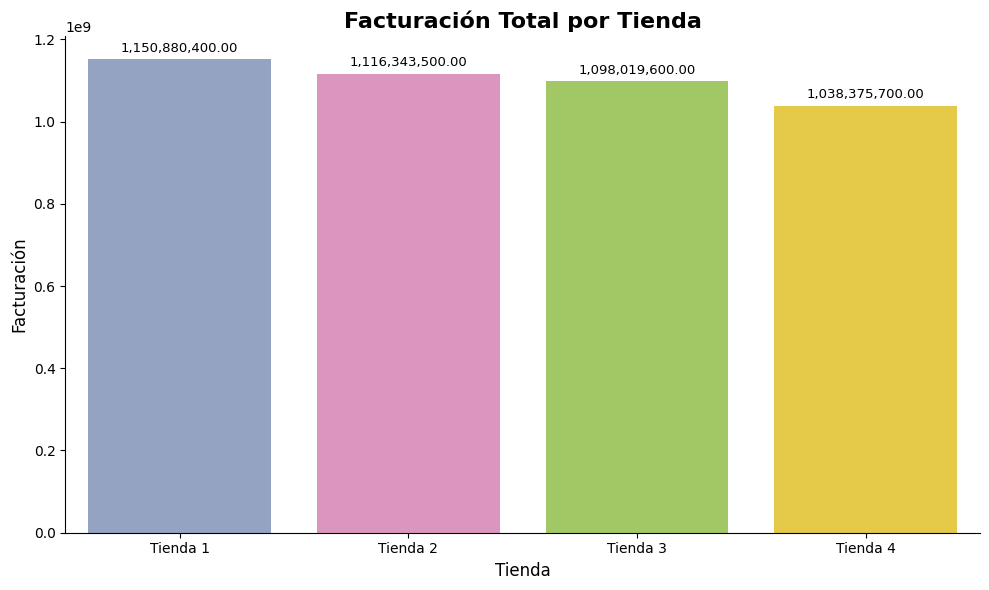

<Figure size 640x480 with 0 Axes>

In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define las URLs de los archivos CSV de cada tienda
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Lista para almacenar DataFrames individuales
dfs = []

# Lee cada archivo y agregar una columna 'Tienda' para identificar su origen
for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    df['Tienda'] = nombre_tienda
    dfs.append(df)

# Une todos los DataFrames en uno solo
df_total = pd.concat(dfs, ignore_index=True)

# Asegura que la columna 'Precio' sea tipo float
df_total['Precio'] = df_total['Precio'].astype(float)

# Calcula facturación total por tienda
facturacion_total = df_total.groupby('Tienda')['Precio'].sum()

# Formatea los números: separador de miles con coma y punto decimal, apóstrofe para millones
def formato_personalizado(numero):
    return f"{numero:,.2f}"

# Crea una nueva Serie con los montos formateados
facturacion_formateada = facturacion_total.apply(formato_personalizado)

# Muestra resumen en consola
print("Facturación total por tienda:")
for tienda, monto in facturacion_formateada.items():
    print(f"{tienda}: {monto}")

# Creamos gráfico de barras
plt.figure(figsize=(10, 6))
colores = sns.color_palette("Set2")  # Paleta de colores para las barras
#colores=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # azul, naranja, verde, rojo

# Creamos gráfico base
ax = sns.barplot(
    x=facturacion_total.index,
    y=facturacion_total.values,
    palette=colores[2:6],
    # palette=colores,
    hue=facturacion_total.index,
    legend=False
)

# Agregar los valores numéricos encima de cada barra
for i, valor in enumerate(facturacion_total.values):
    # texto = formato_personalizado(valor)
    # ax.text(i, valor + valor*0.01, texto, ha='center', va='bottom', fontweight='bold', fontsize=10)
    ax.text(i, valor + valor * 0.01, formato_personalizado(valor),
                ha='center', va='bottom', fontsize=9.5)

# Títulos y etiquetas
plt.title("Facturación Total por Tienda", fontsize=16, fontweight='bold')
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Facturación", fontsize=12)

# Mostrar gráfico con estilo limpio
sns.despine()
plt.tight_layout()
plt.show()
plt.savefig('Facturación Total por Tienda.png')

In [ ]:
print(df_total.head())

            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda 1  
1  T

## Ventas por categoría
En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

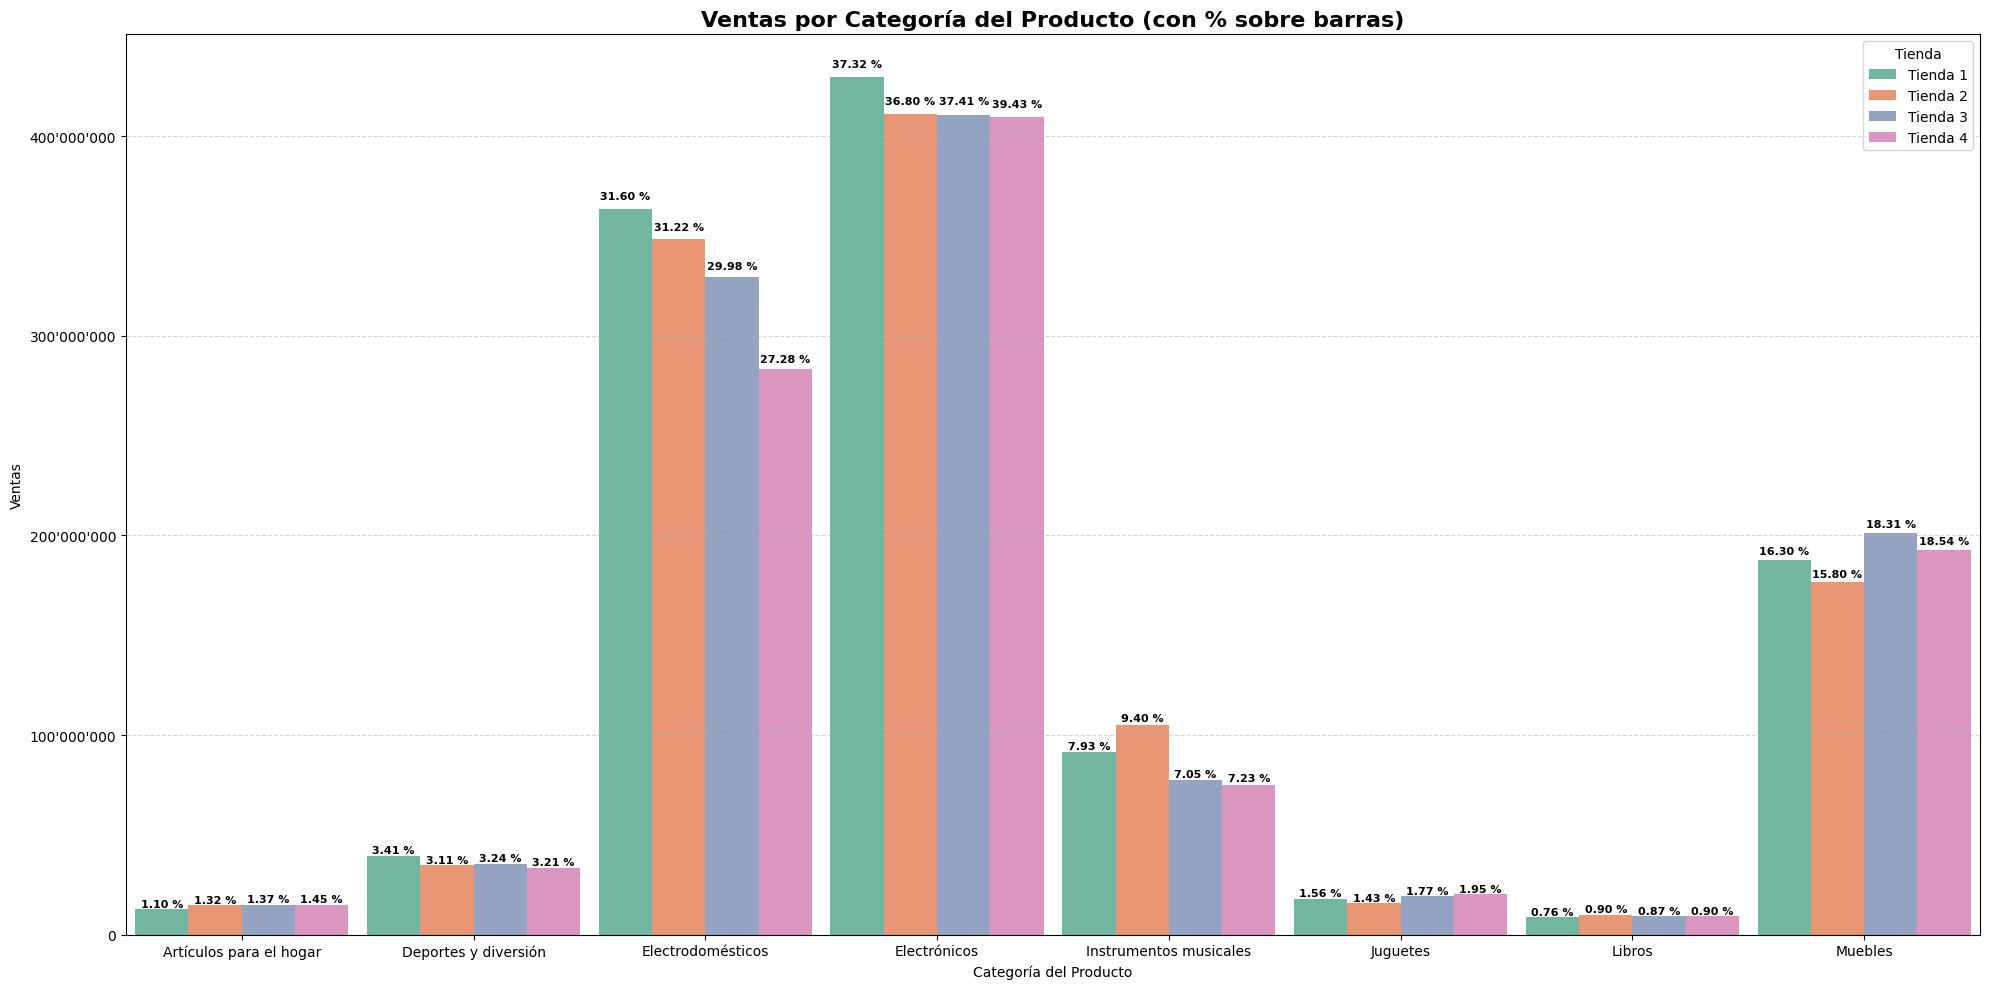


Resumen de ventas por categoría y tienda:



,Tienda,Categoría del Producto,Precio,Porcentaje
0,Tienda 1,Artículos para el hogar,"$12'698'400,00",1.10 %
1,Tienda 1,Deportes y diversión,"$39'290'000,00",3.41 %
2,Tienda 1,Electrodomésticos,"$363'685'200,00",31.60 %
3,Tienda 1,Electrónicos,"$429'493'500,00",37.32 %
4,Tienda 1,Instrumentos musicales,"$91'299'000,00",7.93 %
5,Tienda 1,Juguetes,"$17'995'700,00",1.56 %
6,Tienda 1,Libros,"$8'784'900,00",0.76 %
7,Tienda 1,Muebles,"$187'633'700,00",16.30 %
8,Tienda 2,Artículos para el hogar,"$14'746'900,00",1.32 %
9,Tienda 2,Deportes y diversión,"$34'744'500,00",3.11 %


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pandas as pd

# # Agrupar por Tienda y Categoría, y sumar ventas (Precio)
ventas_por_categoria = df_total.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()

# Cálculo total por tienda
totales_por_tienda = ventas_por_categoria.groupby('Tienda')['Precio'].transform('sum')

# Cálculo porcentaje
ventas_por_categoria['Porcentaje %'] = (ventas_por_categoria['Precio'] / totales_por_tienda) * 100

# Formateando Las columnas precio y %(Porcentaje)
#ventas_por_categoria['Precio'] = ventas_por_categoria['Precio'].apply(lambda x: f"{x:,.2f}")
ventas_por_categoria['Porcentaje %'] = ventas_por_categoria['Porcentaje %'].apply(lambda x: f"{x:.2f} %")

# Mostrar resultado
#print(ventas_por_categoria)

# Asegurarse de que Precio es numérico
ventas_por_categoria['Precio'] = ventas_por_categoria['Precio'].astype(float)

# Calcular el porcentaje real si no está
ventas_por_categoria['Porcentaje'] = ventas_por_categoria.groupby('Tienda')['Precio'].transform(
    lambda x: x / x.sum() * 100
)

# Crear gráfico solo con porcentaje como etiqueta
plt.figure(figsize=(20, 10))
ax = sns.barplot(
    data=ventas_por_categoria,
    x='Categoría del Producto',
    y='Precio',
    hue='Tienda',
    palette='Set2',
    dodge=0.6,
    width=0.92
)

# Agregar etiquetas: solo porcentaje con 2 decimales
for bar in ax.patches:
    altura = bar.get_height()
    if altura == 0:
        continue

    x = bar.get_x() + bar.get_width() / 2
    y = altura

    for _, row in ventas_por_categoria.iterrows():
        if abs(row['Precio'] - altura) < 1e-2:
            porcentaje_txt = f"{row['Porcentaje']:.2f} %"
            ax.text(
                x, y + y * 0.01,
                porcentaje_txt,
                ha='center', va='bottom',
                fontsize=8, fontweight='bold'
            )
            break

# Formatear eje Y estilo latino
formatter = mtick.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", "X").replace(".", ",").replace("X", "'"))
ax.yaxis.set_major_formatter(formatter)

# Estética general
plt.title('Ventas por Categoría del Producto (con % sobre barras)', fontsize=16, fontweight='bold')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Crear columnas con formato
ventas_tabla = ventas_por_categoria.copy()
ventas_tabla['Precio'] = ventas_tabla['Precio'].apply(lambda x: f"${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "'"))
ventas_tabla['Porcentaje'] = ventas_tabla['Porcentaje'].apply(lambda x: f"{x:.2f} %")

# Mostrar tabla final
ventas_tabla_formateada = ventas_tabla[['Tienda', 'Categoría del Producto', 'Precio', 'Porcentaje']]
print("\nResumen de ventas por categoría y tienda:\n")
display(ventas_tabla_formateada)


In [ ]:
import pandas as pd

# Suponiendo que 'ventas_por_categoria' es tu DataFrame original
ventas_tabla = ventas_por_categoria.copy()

# Agrupar por 'Categoría del Producto' y 'Tienda' y calcular los subtotales
ventas_agrupadas = ventas_tabla.groupby(['Categoría del Producto', 'Tienda']).agg({
    'Precio': 'sum',  # Sumar los precios
    'Porcentaje': 'mean'  # Calcular el promedio de los porcentajes
}).reset_index()

# Formatear las columnas
ventas_agrupadas['Precio'] = ventas_agrupadas['Precio'].apply(lambda x: f"${x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "'"))
ventas_agrupadas['Porcentaje'] = ventas_agrupadas['Porcentaje'].apply(lambda x: f"{x:.2f} %")

# Mostrar tabla final con subtotales
ventas_tabla_formateada = ventas_agrupadas[['Tienda', 'Categoría del Producto', 'Precio', 'Porcentaje']]
print("Resumen de ventas por categoría y tienda con subtotales:\n")
print(ventas_tabla_formateada)

Resumen de ventas por categoría y tienda con subtotales:

      Tienda   Categoría del Producto           Precio Porcentaje
0   Tienda 1  Artículos para el hogar   $12'698'400,00     1.10 %
1   Tienda 2  Artículos para el hogar   $14'746'900,00     1.32 %
2   Tienda 3  Artículos para el hogar   $15'060'000,00     1.37 %
3   Tienda 4  Artículos para el hogar   $15'074'500,00     1.45 %
4   Tienda 1     Deportes y diversión   $39'290'000,00     3.41 %
5   Tienda 2     Deportes y diversión   $34'744'500,00     3.11 %
6   Tienda 3     Deportes y diversión   $35'593'100,00     3.24 %
7   Tienda 4     Deportes y diversión   $33'350'100,00     3.21 %
8   Tienda 1        Electrodomésticos  $363'685'200,00    31.60 %
9   Tienda 2        Electrodomésticos  $348'567'800,00    31.22 %
10  Tienda 3        Electrodomésticos  $329'237'900,00    29.98 %
11  Tienda 4        Electrodomésticos  $283'260'200,00    27.28 %
12  Tienda 1             Electrónicos  $429'493'500,00    37.32 %
13  Tienda 2      

Las categorías más populares en las 4 tiendas serían:
*   Electrónicos
*   Electrodomésticos


###Valoración media por tienda

En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

#1. Análisis de facturación



# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda